<a href="https://colab.research.google.com/github/NayanaPradeep/Bike_Sharing_Demand/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **SOLUTION**

## **Importing the libraries**

In [ ]:
# Importing the libraries for EDA and regression analysis
import numpy as np
import pandas as pd
from numpy import math

import matplotlib.pyplot as plt                          
import matplotlib.image as mpimg                             
%matplotlib inline                                            
import seaborn as sns  

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


import warnings
warnings.filterwarnings('ignore')

 

## **Reading the Dataset**

In [ ]:
#Mount the drive to load the dataset 
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Read the file to bikedata_df dataset 
file_path = '/content/drive/MyDrive/Colab Notebooks/Bike Sharing Demand Prediction - Nayana Pradeep/SeoulBikeData.csv'
bikedata_df=pd.read_csv(file_path,sep=',',encoding='latin',date_parser="Date")

## **Exploratory Data Analysis And Visualization**

In [ ]:
#Contents of the dataset
bikedata_df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
#Top 5 records in the dataset
bikedata_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
#Last 5 records in the dataset
bikedata_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


Dataset contains the record from 01/12/2017 to 30/11/2018 which means it contains the data of one full year.

In [ ]:
#Check the number of rows and columns in the dataset
bikedata_df.shape

(8760, 14)

In [ ]:
#Find the total number of elements in the dataset
bikedata_df.size

122640

In [ ]:
#Find the columns and datatypes in the dataset
bikedata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
#Find the type of seasons available
bikedata_df.Seasons.unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [ ]:
# Extracting the date time components
bikedata_df['Date'] = pd.to_datetime(bikedata_df['Date'])
bikedata_df['Year'] = pd.DatetimeIndex(bikedata_df['Date']).year
bikedata_df['Month'] = pd.DatetimeIndex(bikedata_df['Date']).month
bikedata_df['Day'] = pd.DatetimeIndex(bikedata_df['Date']).day
bikedata_df['Day_of_Week'] = pd.DatetimeIndex(bikedata_df['Date']).day_name()

In [ ]:
#Check the changed dataset
bikedata_df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day,Day_of_Week
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Friday
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Friday
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Friday
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Friday


In [ ]:
#Check the weekdays in the dataset
bikedata_df['Day_of_Week'].unique()

array(['Thursday', 'Sunday', 'Wednesday', 'Friday', 'Monday', 'Saturday',
       'Tuesday'], dtype=object)

In [ ]:
#Check the new columns using info()
bikedata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [ ]:
#Checking the total count of bikes rented for each weekday
Bike_Count_per_Weekday=pd.DataFrame(bikedata_df.groupby(['Day_of_Week'])['Rented Bike Count'].sum())
Bike_Count_per_Weekday

,Rented Bike Count
Day_of_Week,
Friday,898966
Monday,863563
Saturday,911475
Sunday,798295
Thursday,928267
Tuesday,862877
Wednesday,908871


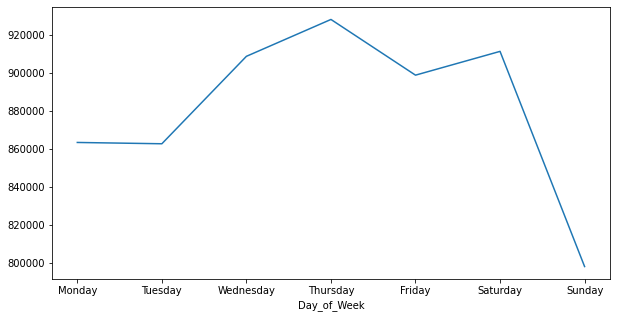

In [ ]:
#Plotting the count v/s weekday
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
bike_dayweek=bikedata_df.groupby("Day_of_Week")['Rented Bike Count'].sum().reindex(days) 
bike_dayweek.plot(figsize=(10,5), sort_columns = 'TRUE')

In [ ]:
#Understand the hour details of the dataset
bikedata_df.Hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [ ]:
#Understanding how the hours are distrinuted and checking if it is a categorical value
bikedata_df["Hour"].value_counts().sort_index()

0     365
1     365
2     365
3     365
4     365
5     365
6     365
7     365
8     365
9     365
10    365
11    365
12    365
13    365
14    365
15    365
16    365
17    365
18    365
19    365
20    365
21    365
22    365
23    365
Name: Hour, dtype: int64

In [ ]:
#Descriptive Statistic Summary
bikedata_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Year,Month,Day
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,2017.915068,6.526027,15.720548
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,0.278796,3.448048,8.796749
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,2018.000000,4.000000,8.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,2018.000000,7.000000,16.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,2018.000000,10.000000,23.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,2018.000000,12.000000,31.000000


In [ ]:
#Checking the count for each of the dates provided
bikedata_df["Date"].value_counts()

2018-05-21    24
2018-07-11    24
2018-10-20    24
2018-05-15    24
2018-08-24    24
              ..
2018-09-18    24
2018-04-13    24
2018-07-23    24
2018-02-15    24
2017-12-14    24
Name: Date, Length: 365, dtype: int64

In [ ]:
#Checking for null values
bikedata_df.isna().sum().sum()

0

In [ ]:
#Checking for duplicate values
len(bikedata_df[bikedata_df.duplicated()])

0

In [ ]:
#Finding the number of records for each of the seasons
bikedata_df["Seasons"].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
#Finding the number of days in a year for each of the seasons
bikedata_df["Seasons"].value_counts()/24

Spring    92.0
Summer    92.0
Autumn    91.0
Winter    90.0
Name: Seasons, dtype: float64

In [ ]:
ByDate_df = bikedata_df.groupby('Date')
ByDate_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day,Day_of_Week
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8736,2018-11-30,474,0,1.8,62,1.6,1411,-4.7,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Friday
8737,2018-11-30,456,1,1.3,63,2.0,1379,-4.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Friday
8738,2018-11-30,300,2,0.6,66,0.5,1368,-5.0,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Friday
8739,2018-11-30,213,3,-0.1,69,0.9,1338,-5.1,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,Friday


In [ ]:
#Total number of bikes rent per season
bikedata_df.groupby('Seasons').sum()['Rented Bike Count']

Seasons
Autumn    1790002
Spring    1611909
Summer    2283234
Winter     487169
Name: Rented Bike Count, dtype: int64

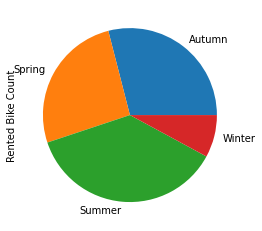

In [ ]:
#Total number of bikes rent per season ----pie chart
bikedata_df.groupby('Seasons').sum()['Rented Bike Count'].plot.pie()

In [ ]:
bikedata_df.groupby('Functioning Day').sum()['Rented Bike Count']

Functioning Day
No           0
Yes    6172314
Name: Rented Bike Count, dtype: int64

In [ ]:
#Holiday and non-holiday counts
bikedata_df.groupby('Holiday').sum()['Rented Bike Count']

Holiday
Holiday        215895
No Holiday    5956419
Name: Rented Bike Count, dtype: int64

In [ ]:
#Display the dates with the least number  of bikes rented
bikedata_df.groupby('Date',sort='True').sum()['Rented Bike Count'].nsmallest(20)

Date
2018-02-10       0
2018-03-11       0
2018-04-10       0
2018-06-11       0
2018-09-10       0
2018-09-11       0
2018-09-18       0
2018-09-19       0
2018-09-28       0
2018-09-30       0
2018-10-05       0
2018-11-04       0
2018-04-23     977
2018-08-11    1721
2017-12-24    2014
2018-04-02    2487
2018-02-16    2593
2018-05-04    2596
2017-12-18    2620
2018-01-27    2693
Name: Rented Bike Count, dtype: int64

In [ ]:
#Display the dates with the most number  of bikes rented
bikedata_df.groupby('Date',sort='True').sum()['Rented Bike Count'].nlargest(20)

Date
2018-06-13    36149
2018-06-19    35349
2018-08-06    35103
2018-06-20    34639
2018-06-21    34621
2018-12-06    34544
2018-06-16    34360
2018-06-22    34079
2018-06-07    33676
2018-06-15    33492
2018-05-06    33424
2018-04-06    33257
2018-06-25    32702
2018-06-17    32487
2018-07-06    32002
2018-06-23    31949
2018-01-06    31928
2018-12-09    31809
2018-04-07    31781
2018-11-09    31694
Name: Rented Bike Count, dtype: int64

We can conclude the below details about the data from the primary checks performed above
 

*   Dataset contains the details of each hour from 01/12/2017 to 30/11/2018 .This means that the 8760 records are the 24 records for each day in the one year duration (24 * 365 = 8760 )
*   There are **no null values** in the dataset
*   Date, Hour , Seasons, Functioning Day and Holiday are the categorical features
*   There are **no duplicates** in the dataset
*   Maximum number of bikes rented in an hour is 3556. The average count is 704.602055

*   Maximum number of bikes rented in a day is 36149 on 13th June 2018 (13/06/2018)    
*   There were 12 days in the year where there were no bikes rented in a day. These 12 days are considered as non functioning day as per the data set.


*   People rent the **most number of bikes during the summer season and least during the winter season**


*   Bike rental demand is less on holidays. This indicates that people prefer to use these bikes as mode of transportation to work.




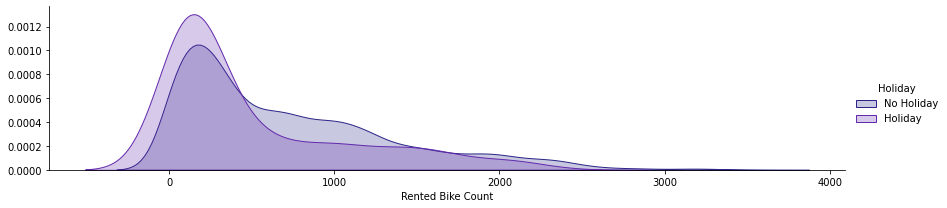

In [ ]:
#Plot to find the rented bike count for each season
sns.set_palette("CMRmap")
fig = sns.FacetGrid(bikedata_df, hue='Holiday', aspect=4)
fig.map(sns.kdeplot, 'Rented Bike Count', shade=True)
fig.add_legend()

Above plot is a visualization for the demand difference when it is a holiday and when it is not.

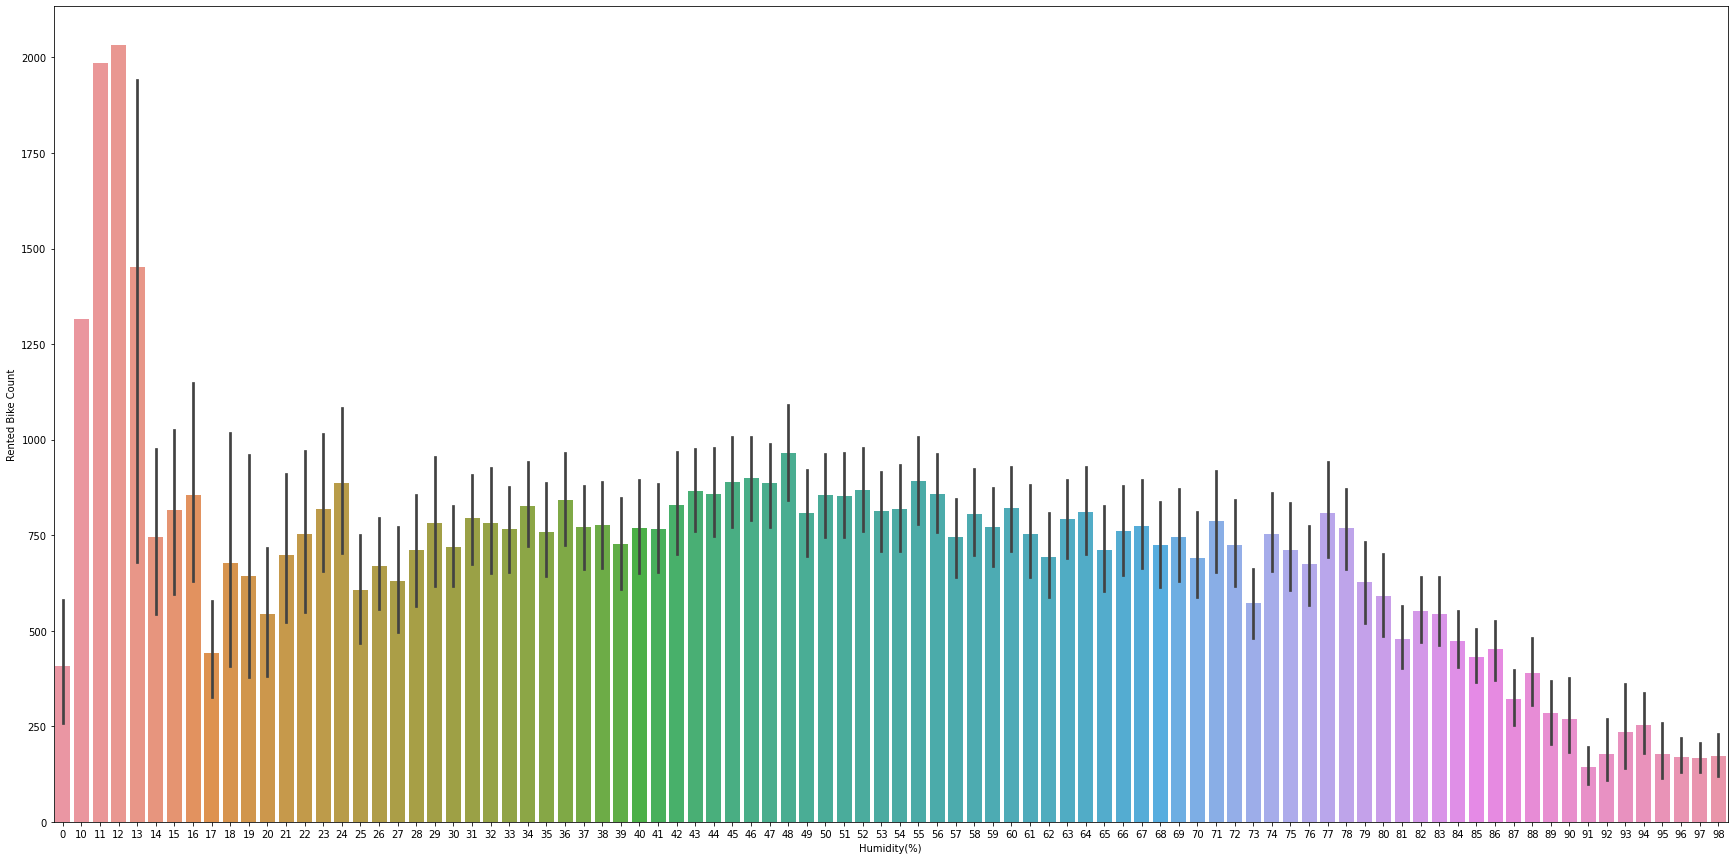

In [ ]:
#Using the barplot to understand how the humidity is impacting the count of rented bikes
plt.figure(figsize=(30,15))
sns.barplot(data=bikedata_df, x="Humidity(%)",y="Rented Bike Count")

Rented Bike count is less when the humidity is high

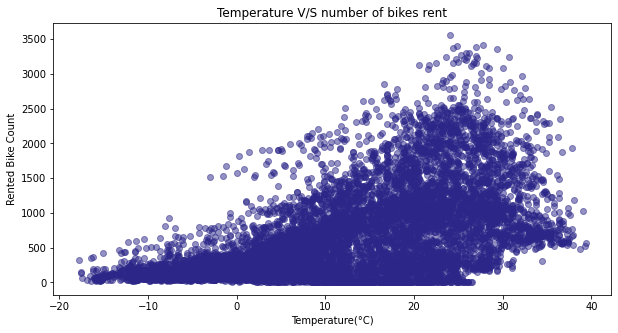

In [ ]:
#Using the scatterplot to understand the temperature impact on rented bike count
plt.figure(figsize=(10,5))
plt.scatter(bikedata_df['Temperature(°C)'], bikedata_df['Rented Bike Count'], alpha=0.5)
plt.title('Temperature V/S number of bikes rent')
plt.xlabel('Temperature(°C)')
plt.ylabel('Rented Bike Count')
plt.show()

The temperature and the bike rental demand seem to be having an almost linear relationship from the looks of above plot.

As the temperature increases, there is a rise in number of bikes rent. This explains the maximum demand during the summer season

Text(0.5, 1.0, 'Bikes rented in different hours of day')

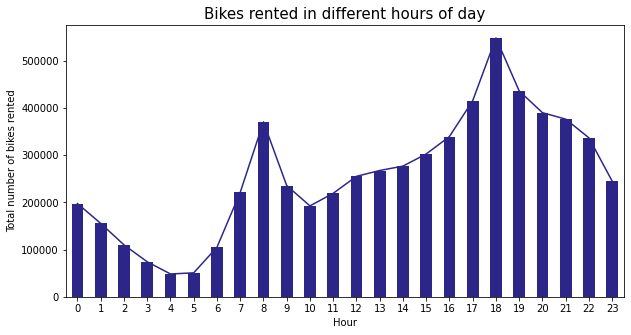

In [ ]:
#Hourly distribution of the bike rental service rented count 
bikedata_df.groupby('Hour')['Rented Bike Count'].sum().plot.bar(figsize=(10,5))
bikedata_df.groupby('Hour')['Rented Bike Count'].sum().plot()
plt.ylabel('Total number of bikes rented')
plt.title('Bikes rented in different hours of day',size=15)

Text(0.5, 1.0, 'Distribution of rented bike count over the hours with respect to the 4 seasons')

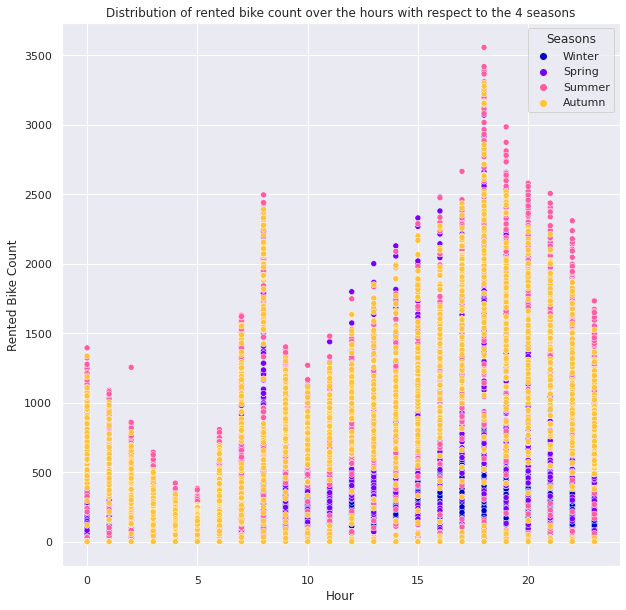

In [ ]:
#Distribution of the rent bike count over the hours of data along with the seasons
sns.set(rc={"figure.figsize": (10, 10)})
ax= sns.scatterplot(data=bikedata_df, x="Hour", y="Rented Bike Count",hue='Seasons',palette='gnuplot2')
ax.set_title('Distribution of rented bike count over the hours with respect to the 4 seasons')

 
*   Bike rental demand is at its peak between 15th hour to 20 th hour ie 3 pm to 8pm. 
*   The demand for the bike rental service is the most at 6pm to 7 pm.
*   People avail this service least during 4 am to 6 am


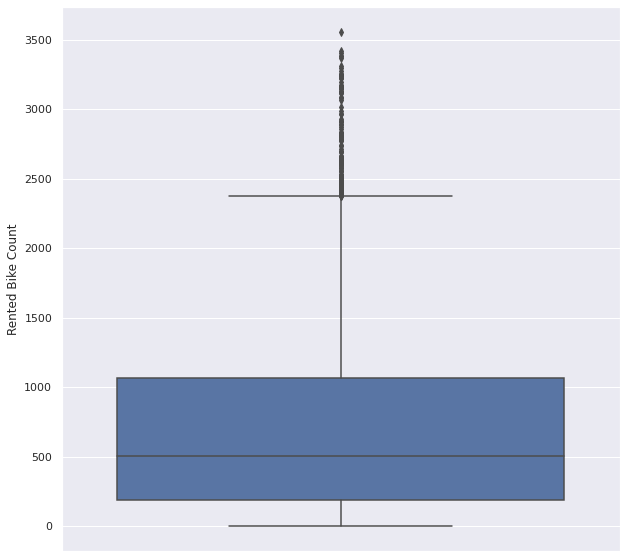

In [ ]:
#Finding outliers in the dependent variable
sns.boxplot(data=bikedata_df,  y='Rented Bike Count')

We can infer the existence of the outliers and  that the median of the 'Rent Bike Count' is 500.  Since the outlier data is minimal, it is not necessary to remove them. 


In [ ]:
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
  
l_encode = LabelEncoder() 
  
bikedata_df['Holiday']= l_encode.fit_transform(bikedata_df['Holiday']) 
bikedata_df['Functioning Day']= l_encode.fit_transform(bikedata_df['Functioning Day'])
bikedata_df['Seasons']= l_encode.fit_transform(bikedata_df['Seasons'])
bikedata_df['Day_of_Week']= l_encode.fit_transform(bikedata_df['Day_of_Week'])

In [ ]:
bikedata_df['Seasons'].value_counts()

2    2208
1    2208
0    2184
3    2160
Name: Seasons, dtype: int64

In [ ]:
bikedata_df['Holiday'].value_counts()

1    8328
0     432
Name: Holiday, dtype: int64

In [ ]:
bikedata_df['Functioning Day'].value_counts()

1    8465
0     295
Name: Functioning Day, dtype: int64

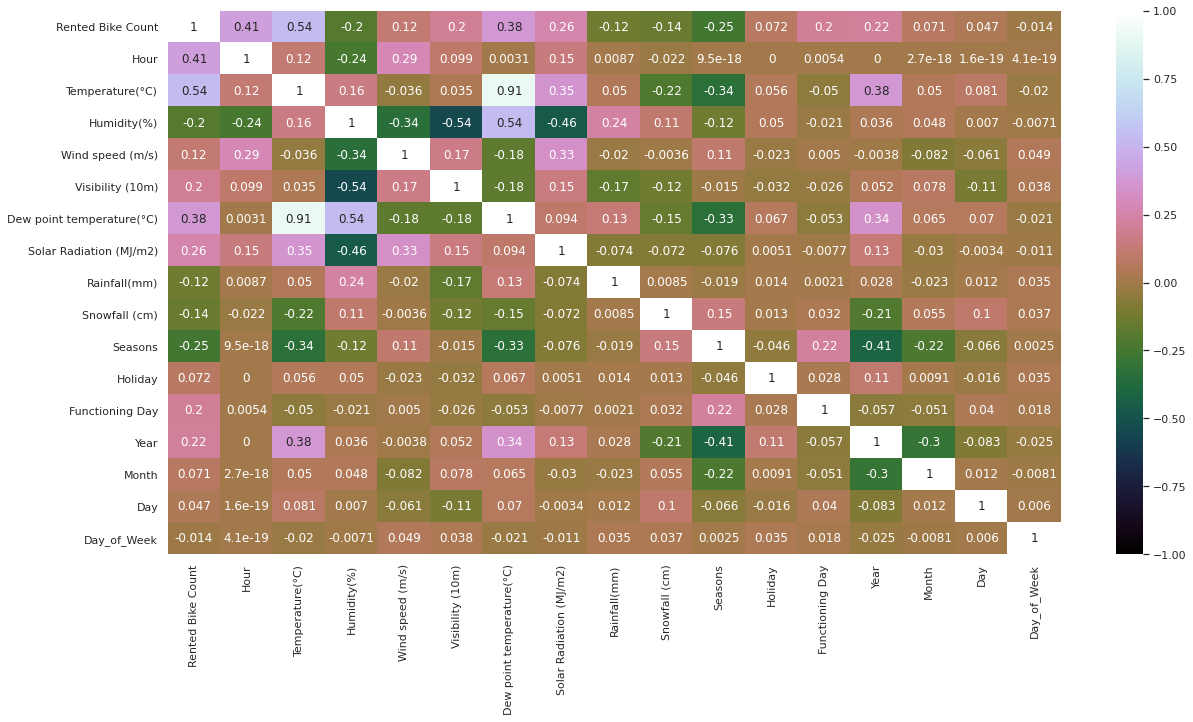

In [ ]:
#Correlation map for the dataset
plt.figure(figsize=(20,10))
sns.heatmap(bikedata_df.corr(), vmin=-1, cmap='cubehelix', annot=True)



1.   Temperature and Dew point temperature  are strongly correlated, value being  0.91.This is a case of multicollinearity.

2.   Humidity and Dew point temperature are strongly correlated

3.   Visibility and Humidity are strongly correlated

4.   Visibility is negatively correlated to dew point temperature, rainfall and snowfall.

5.   Correlation between Rented bike count and Dew point Temperature is 0.38
6.   Correlation between Rented bike count and Temperature is 0.56.





## **Dependent Variable and its Relation with the Numeric Features**

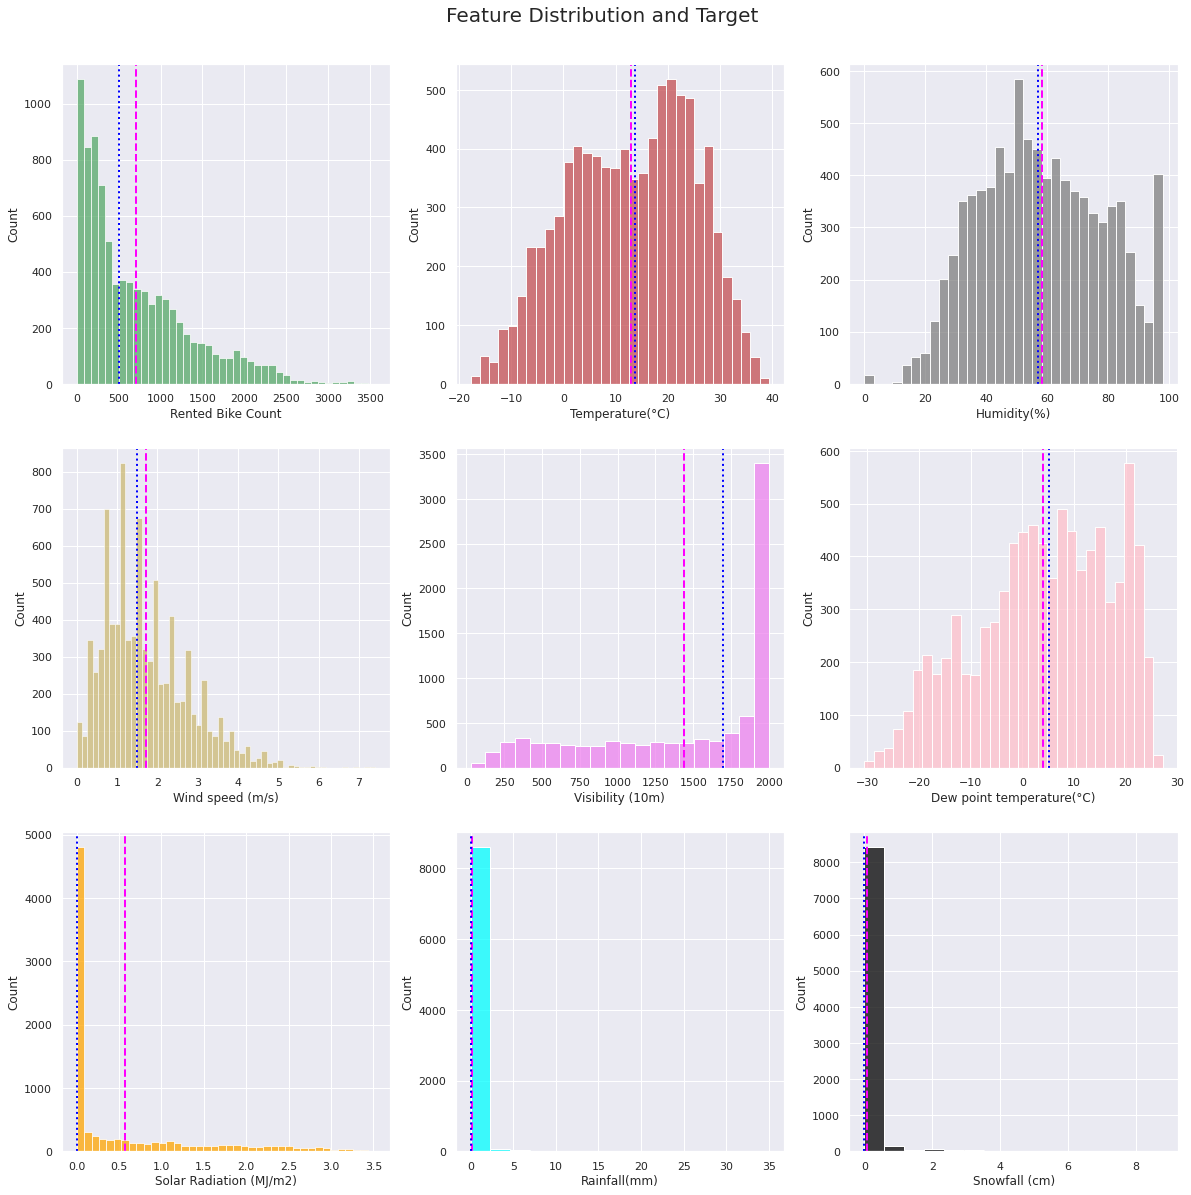

In [ ]:
#Plotting the numerical features to understand their distribution with respect to the mean and median

categorical_features = ['Date','Hour', 'Seasons','Holiday','Functioning Day','Year','Month','Day','Day_of_Week']   #Categorical Features   
numeric_features_and_depend_var = [i for i in bikedata_df.describe().columns if i not in categorical_features]      #Numerical Features with dependent variable
                                                                                   
plot_colours=['g','r','grey','y','violet','pink','orange','cyan','black']                                           #Different Colour for each plot

numeric_features_and_depend_var = np. reshape(numeric_features_and_depend_var, (3, 3))                              #Transforming to 2-D array for ease of display and loop  
plot_colours = np. reshape(plot_colours, (3, 3))                                                                    #Transforming to 2-D array for ease of display and loop

fig, ax = plt.subplots(3,3, figsize=(20,20))

for i in range(0,3):
  for j in range(0,3):
    feature = numeric_features_and_depend_var[i][j]
    plt_colour=plot_colours[i][j]
    sns.histplot(bikedata_df[feature], ax=ax[i][j],color=plt_colour)
    ax[i][j].axvline(bikedata_df[feature].mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax[i][j].axvline(bikedata_df[feature].median(), color='blue', linestyle='dotted', linewidth=2)

fig.suptitle('Feature Distribution and Target', fontsize=20, y=0.92)    
plt.show()
    

From the above distribution plot, we can see the following


*   Rented Bike Count, windspeed, solar radiation, rainfall and snowfall are  positively skewed
*   Temperature and humidity is uniformly distributed
*   Visibility and dewpoint temperature is negatively skewed






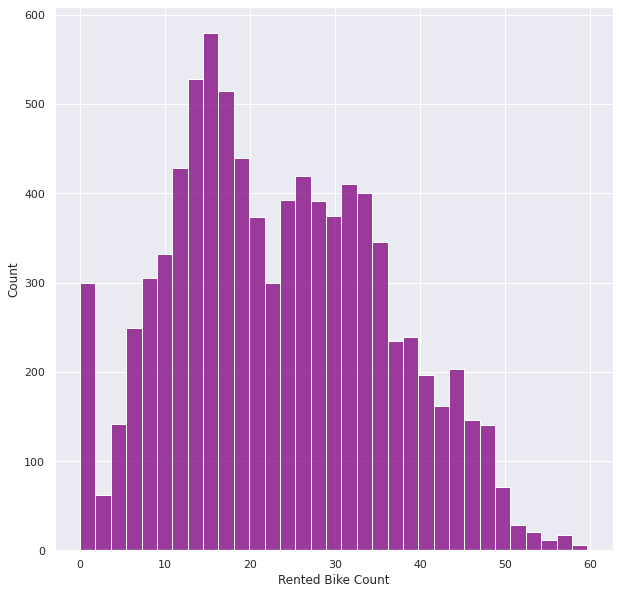

In [ ]:
#square root transformation of the target variable
sns.histplot(np.sqrt(bikedata_df['Rented Bike Count']),color='Purple')

As we can see above , the square root transformation of the varible 'Rented Bike Count' has made it uniformly distributed.

In [ ]:
#Identifying the numeric features
depend_var = 'Rented Bike Count' #Dependent Variable --- Rented Bike Count
numeric_features = [i for i in bikedata_df.describe().columns if i not in depend_var and i not in categorical_features ]
numeric_features


['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [ ]:
depend_var = 'Rented Bike Count' #Dependent Variable --- Rented Bike Count

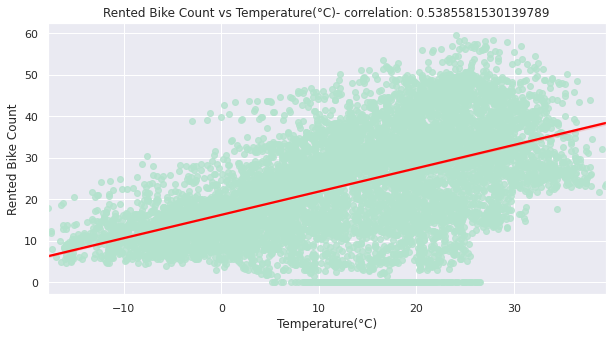

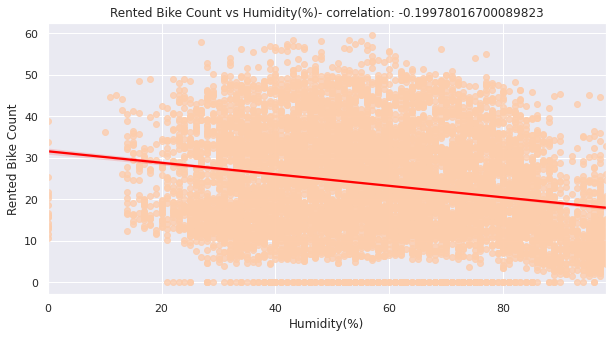

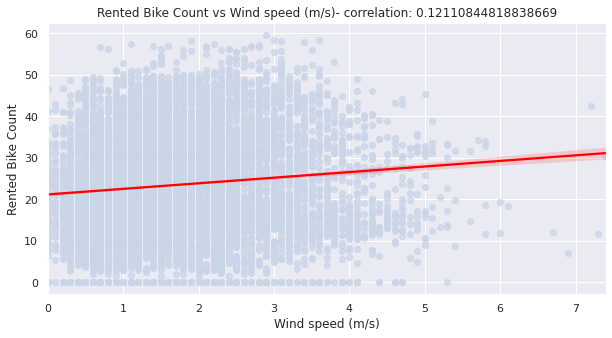

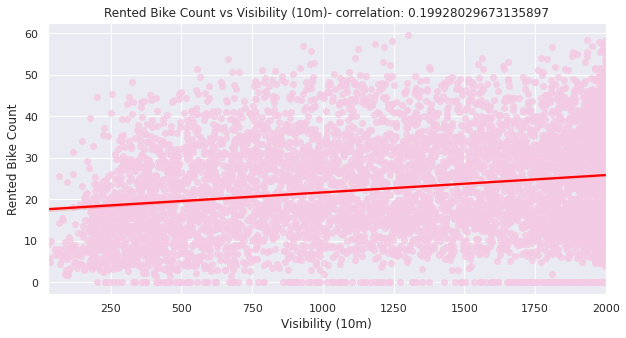

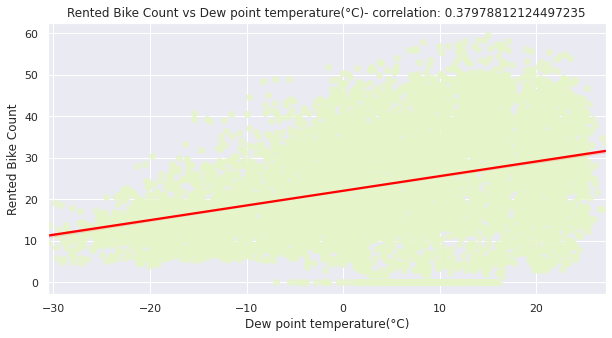

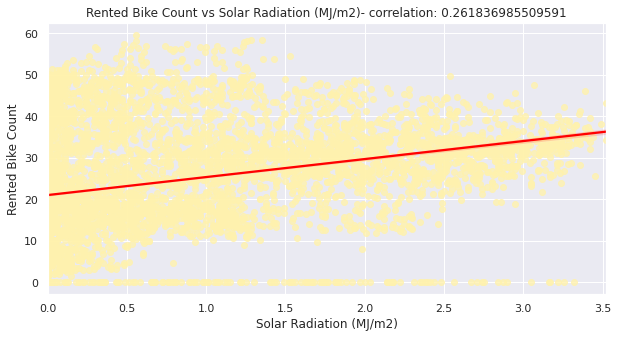

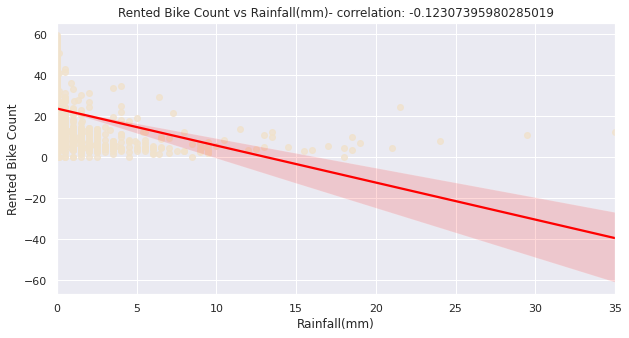

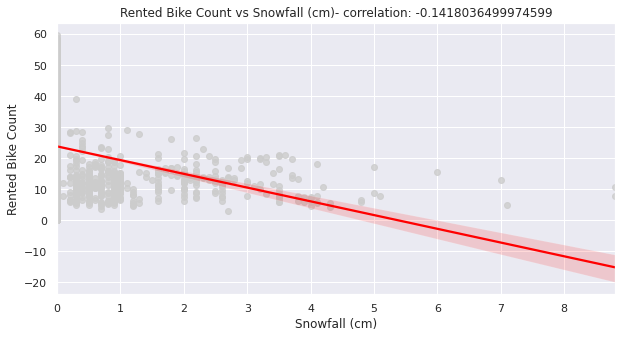

In [ ]:
#Plotting the numeric values distribution with respect to the dependent variable Rented Bike Count
rgb_values = sns.color_palette("Pastel2")
color_map = dict(zip(numeric_features, rgb_values))
plt.rcParams['figure.figsize'] = (10, 5)
for col, key in zip(numeric_features, color_map):
  plt.figure()
  feature = bikedata_df[col]
  label = bikedata_df['Rented Bike Count']
  correlation = feature.corr(label)
  sns.regplot(x=bikedata_df[col], y = np.sqrt(bikedata_df['Rented Bike Count']),scatter_kws={"color": color_map[key]}, line_kws={"color": "red"}).set(title='Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))

In [ ]:
#Correlation table of numeric features with Rented Bike Count in descending order
corr=pd.DataFrame(bikedata_df.corr().unstack().sort_values(ascending=False)['Rented Bike Count'],columns=['Correlation with Rented Bike Count'])
corr.style.background_gradient(cmap=sns.light_palette("Green", as_cmap=True))

,Correlation with Rented Bike Count
Rented Bike Count,1.000000
Temperature(°C),0.538558
Hour,0.410257
Dew point temperature(°C),0.379788
Solar Radiation (MJ/m2),0.261837
Year,0.215162
Functioning Day,0.203943
Visibility (10m),0.199280
Wind speed (m/s),0.121108
Holiday,0.072338


Key takeaways from the analysis so far :


*   The dependent variable 'Rented Bike Count' has a negative correlation with the temperature 

*   Numeric features 'Dew point temperature(°C)' and 'Temperature(°C)'  have a very strong correlation. Inorder to avoid multicollinearity,it is safer to drop the column 'Dew point temperature(°C)' as it correlation to rented bike count is less compared to Temperature.

*  The bike rental demands decreases when the humidity increases.

*  Less visibility, more rainfall or snowfall is also contributing to less number of bike rental services.


In [ ]:
#Dropping the non numeric feature
bikedata_df.drop(['Date'], axis = 1,inplace=True)

In [ ]:
# Dropping dew point temperature column due to high multicollinearity
bikedata_df.drop(['Dew point temperature(°C)'], axis = 1,inplace=True)

## **Data Preparation**

In [ ]:
# Create the independent variable data
X = bikedata_df.drop(['Rented Bike Count'],axis=1)


# Create the dependent variable data
y = np.sqrt(bikedata_df['Rented Bike Count'])


In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
#Checking the test and train sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6570, 15)
(6570,)
(2190, 15)
(2190,)


In [ ]:
#Function for printing the evaluation metrics of each of the predictive models
def print_metric(model_name,y_test,y_pred):
  print(model_name + ' Training Metrics')
  print('MAE:', mean_absolute_error(y_test, y_pred))
  print('MSE:', mean_squared_error(y_test, y_pred))
  print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
  print('R2:', r2_score(y_test, y_pred))
  

In [ ]:
#Declaring a dataset for storing the evaluation metrics for each of the models
column_names = ["MODEL NAME", "MAE", "MSE","RMSE","R2"]
metrics_df = pd.DataFrame(columns = column_names) 

## **Linear Regression**

In [ ]:
# Fitting Linear Regression to the Training set
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
linear_reg.coef_

array([ 4.77042354e-01,  5.63105740e-01, -1.54703440e-01,  8.84962979e-02,
        4.20250081e-04, -9.54126276e-01, -1.45509188e+00,  2.92940663e-02,
       -2.16943604e+00,  3.27802146e+00,  2.86100524e+01, -1.38229774e+00,
        7.04867127e-02, -1.44788719e-03, -6.05190561e-02])

In [ ]:
y_pred = linear_reg.predict(X_test)

In [ ]:
#Evaluation of the model
metrics_df=metrics_df.append({'MODEL NAME': 'Linear Regression', 'MAE':mean_absolute_error(y_test, y_pred), 'MSE':mean_squared_error(y_test, y_pred), 'RMSE':np.sqrt(mean_squared_error(y_test, y_pred)), 'R2':r2_score(y_test, y_pred)}, ignore_index=True)
print_metric("Linear Regression",y_test,y_pred)

Linear Regression Training Metrics
MAE: 5.660417893430779
MSE: 54.05488568978613
RMSE: 7.352202778064961
R2: 0.6578077075559197


## **Lasso Regression**

In [ ]:
# Fitting Lasso Regression to the Training set
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso.coef_

array([ 4.77180267e-01,  5.62785380e-01, -1.54579235e-01,  8.66484104e-02,
        4.20688829e-04, -9.50000494e-01, -1.45446962e+00,  2.33377122e-02,
       -2.16411037e+00,  3.25567638e+00,  2.85732678e+01, -1.35459946e+00,
        7.14244102e-02, -1.24533958e-03, -5.99946644e-02])

In [ ]:
y_pred=lasso.predict(X_test)

In [ ]:
#Evaluation of the model
metrics_df=metrics_df.append({'MODEL NAME': 'Lasso Regression', 'MAE':mean_absolute_error(y_test, y_pred), 'MSE':mean_squared_error(y_test, y_pred),'RMSE':np.sqrt(mean_squared_error(y_test, y_pred)), 'R2':r2_score(y_test, y_pred)}, ignore_index=True)
print_metric("Lasso Regression",y_test,y_pred)

Lasso Regression Training Metrics
MAE: 5.660956563638153
MSE: 54.0561990479736
RMSE: 7.352292094848626
R2: 0.6577993933944293


## **Ridge Regression**

In [ ]:
# Fitting Ridge Regression to the Training set
ridge = Ridge(alpha=30)
ridge.fit(X_train,y_train)

Ridge(alpha=30, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
y_pred=ridge.predict(X_test)

In [ ]:
metrics_df=metrics_df.append({'MODEL NAME': 'Ridge Regression', 'MAE':mean_absolute_error(y_test, y_pred), 'MSE':mean_squared_error(y_test, y_pred), 'RMSE':np.sqrt(mean_squared_error(y_test, y_pred)), 'R2':r2_score(y_test, y_pred)}, ignore_index=True)
print_metric("Ridge Regression",y_test,y_pred)

Ridge Regression Training Metrics
MAE: 5.703254454109305
MSE: 54.60897217620785
RMSE: 7.389788371544062
R2: 0.6543000852090879


## **Decision Tree** 

In [ ]:
#importing libraries for Decision Tree
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()

In [ ]:
# Fitting Decision Tree to the Training set
dtree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred=dtree.predict(X_test)

In [ ]:
#Evaluation of the model
metrics_df=metrics_df.append({'MODEL NAME': 'Decision Tree', 'MAE':mean_absolute_error(y_test, y_pred), 'MSE':mean_squared_error(y_test, y_pred),'RMSE':np.sqrt(mean_squared_error(y_test, y_pred)), 'R2':r2_score(y_test, y_pred)}, ignore_index=True)
print_metric("Decision Tree",y_test,y_pred)

Decision Tree Training Metrics
MAE: 3.227995456849325
MSE: 27.468964253623543
RMSE: 5.241084263167646
R2: 0.8261088201544743


## **Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()

In [ ]:
# Fitting Gradient Boosting Regression to the Training set
gb.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y_pred=gb.predict(X_test)

In [ ]:
#Evaluation of the model
metrics_df=metrics_df.append({'MODEL NAME': 'Gradient Boosting', 'MAE':mean_absolute_error(y_test, y_pred), 'MSE':mean_squared_error(y_test, y_pred), 'RMSE':np.sqrt(mean_squared_error(y_test, y_pred)),'R2':r2_score(y_test, y_pred)}, ignore_index=True)
print_metric("Gradient Boosting",y_test,y_pred)

Gradient Boosting Training Metrics
MAE: 3.1409279751073362
MSE: 19.48595447016415
RMSE: 4.414289803599686
R2: 0.8766449443835125


## **XGBoost**

In [ ]:
#importing the libraries
from xgboost import XGBRegressor

xg_boost = XGBRegressor()
xg_boost.fit(X_train,y_train)

[19:20:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = xg_boost.predict(X_test)

In [ ]:
#Evaluation of the model
metrics_df=metrics_df.append({'MODEL NAME': 'XGBoost', 'MAE':mean_absolute_error(y_test, y_pred), 'MSE':mean_squared_error(y_test, y_pred), 'RMSE':np.sqrt(mean_squared_error(y_test, y_pred)),'R2':r2_score(y_test, y_pred)}, ignore_index=True)
print_metric("XGBoost",y_test,y_pred)

XGBoost Training Metrics
MAE: 3.1139086468938473
MSE: 19.202553766527622
RMSE: 4.382071857754916
R2: 0.8784390012059464


## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()

In [ ]:
# Fitting Random Forest to the Training set
rf_regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred=rf_regressor.predict(X_test)

In [ ]:
#Evaluation of the model
metrics_df=metrics_df.append({'MODEL NAME': 'Random Forest', 'MAE':mean_absolute_error(y_test, y_pred), 'MSE':mean_squared_error(y_test, y_pred), 'RMSE':np.sqrt(mean_squared_error(y_test, y_pred)),'R2':r2_score(y_test, y_pred)}, ignore_index=True)
print_metric("Random Forest",y_test,y_pred)

Random Forest Training Metrics
MAE: 2.415778550690483
MSE: 13.510165320083283
RMSE: 3.6756176787151413
R2: 0.9144744386527976


Let's try hyperparameter tuning in some of the already experimented models.

## **XGBoost - GridSearchCV**

In [ ]:
# Hyperparameter Tuning
param_dict = {'n_estimators' : [50,80,100],
              'max_depth' : [6,8,10,12],
              'min_samples_split' : [10,50,100],
              'min_samples_leaf' : [30,40,50]}


param_dict

{'max_depth': [6, 8, 10, 12],
 'min_samples_leaf': [30, 40, 50],
 'min_samples_split': [10, 50, 100],
 'n_estimators': [50, 80, 100]}

In [ ]:
from sklearn.model_selection import GridSearchCV

xg_model_gridcv = GridSearchCV(estimator=xg_boost,
                       param_grid = param_dict,
                       cv = 5, verbose=2)



In [ ]:
xg_model_gridcv.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50 
[19:23:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50, total=   0.3s
[CV] max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50 
[19:23:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50, total=   0.3s
[CV] max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50 
[19:23:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50, total=   0.3s
[CV] max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50 
[19:23:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50, total=   0.3s
[CV] max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50 
[19:23:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50, total=   0.3s
[CV] max_dept

[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:  7.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [30, 40, 50],
                   

In [ ]:
xg_model_gridcv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=1, min_samples_leaf=30,
             min_samples_split=10, missing=None, n_estimators=100, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)

In [ ]:
xg_model_gridcv.best_params_

{'max_depth': 8,
 'min_samples_leaf': 30,
 'min_samples_split': 10,
 'n_estimators': 100}

In [ ]:
xg_model_gridcv_best = xg_model_gridcv.best_estimator_

In [ ]:
y_pred = xg_model_gridcv_best.predict(X_test)

In [ ]:
#Evaluation of the model
metrics_df=metrics_df.append({'MODEL NAME': 'XGBoost- GridSearchCV','MAE':mean_absolute_error(y_test, y_pred), 'MSE':mean_squared_error(y_test, y_pred), 'RMSE':np.sqrt(mean_squared_error(y_test, y_pred)),'R2':r2_score(y_test, y_pred)}, ignore_index=True)
print_metric("XGBoost- GridSearchCV",y_test,y_pred)

XGBoost- GridSearchCV Training Metrics
MAE: 2.0239312402965672
MSE: 10.00143590368713
RMSE: 3.1625046883265058
R2: 0.9366863099247676


## **Random Forest - GridSearchCV**

In [ ]:
rf_gridcv = GridSearchCV(estimator=rf_regressor,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

#Evaluating the optimal parameters
rf_gridcv.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50, total=   0.5s
[CV] max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50, total=   0.5s
[CV] max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50 
[CV]  max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50, total=   0.5s
[CV] max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50 
[CV]  max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50, total=   0.5s
[CV] max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50 
[CV]  max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50, total=   0.5s
[CV] max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80 
[CV]  max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80, total=   0.8s
[CV] max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80 
[CV]  max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80, total=   0.9s
[CV] max_depth=6, min_samples_leaf=30, min_samples_s

[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:  8.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
rf_gridcv.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=12, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=30,
                      min_samples_split=50, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rf_gridcv.best_params_

{'max_depth': 12,
 'min_samples_leaf': 30,
 'min_samples_split': 50,
 'n_estimators': 100}

In [ ]:
rf_gridcv_best = rf_gridcv.best_estimator_

In [ ]:
y_pred =rf_gridcv_best.predict(X_test)

In [ ]:
#Evaluation of the model
metrics_df=metrics_df.append({'MODEL NAME': 'Random Forest- GridSearchCV', 'MAE':mean_absolute_error(y_test, y_pred), 'MSE':mean_squared_error(y_test, y_pred),'RMSE':np.sqrt(mean_squared_error(y_test, y_pred)), 'R2':r2_score(y_test, y_pred)}, ignore_index=True)
print_metric("Random Forest- GridSearchCV",y_test,y_pred)

Random Forest- GridSearchCV Training Metrics
MAE: 3.269691344029882
MSE: 21.41939752304873
RMSE: 4.628109497737573
R2: 0.8644053604470383


## **Random Forest - RandomizedSearchCV**

In [ ]:
#Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

estimators_number = [int(x) for x in np.linspace(start = 5 , stop = 15, num = 10)] # returns 10 numbers

features_max = ['auto', 'log2']

depth_max = [int(x) for x in np.linspace(5, 10, num = 2)]
depth_max.append(None)

bootstrap_val = [True, False]


r_grid = {'n_estimators': estimators_number ,
          'max_features': features_max,
          'max_depth': depth_max ,
          'bootstrap': bootstrap_val }
               
 

rf_randomcv = RandomizedSearchCV(estimator=rf_regressor, param_distributions = r_grid,cv = 2, n_iter = 10, n_jobs=-1)
rf_randomcv.fit(X_train, y_train)

RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_randomcv.best_estimator_

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=11, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rf_randomcv.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'log2',
 'n_estimators': 11}

In [ ]:
rf_randomcv_best = rf_randomcv.best_estimator_

In [ ]:
y_pred = rf_randomcv_best.predict(X_test)

In [ ]:
#Evaluation of the model
metrics_df=metrics_df.append({'MODEL NAME': 'Random Forest- RandomizedSearchCV','MAE':mean_absolute_error(y_test, y_pred), 'MSE':mean_squared_error(y_test, y_pred), 'RMSE':np.sqrt(mean_squared_error(y_test, y_pred)),'R2':r2_score(y_test, y_pred)}, ignore_index=True)
print_metric("Random Forest- RandomizedSearchCV",y_test,y_pred)

Random Forest- RandomizedSearchCV Training Metrics
MAE: 2.647432271722952
MSE: 15.3096770881966
RMSE: 3.9127582455598504
R2: 0.90308270135925


## **PREDICTION MODEL COMPARISON**

In [ ]:
metrics_df

,MODEL NAME,MAE,MSE,RMSE,R2
0,Linear Regression,5.660418,54.054886,7.352203,0.657808
1,Lasso Regression,5.660957,54.056199,7.352292,0.657799
2,Ridge Regression,5.703254,54.608972,7.389788,0.654300
3,Decision Tree,3.227995,27.468964,5.241084,0.826109
4,Gradient Boosting,3.140928,19.485954,4.414290,0.876645
5,XGBoost,3.113909,19.202554,4.382072,0.878439
6,Random Forest,2.415779,13.510165,3.675618,0.914474
7,XGBoost- GridSearchCV,2.023931,10.001436,3.162505,0.936686
8,Random Forest- GridSearchCV,3.269691,21.419398,4.628109,0.864405
9,Random Forest- RandomizedSearchCV,2.647432,15.309677,3.912758,0.903083


## **CONCLUSION**


From the above table for model evaluation metrics comparison, we can see that **XGBoost- GridSearchCV** being the model with highest rsquare and least error rate, works best among the experimented regression models for the given dataset.






In [ ]:
#  Regression analysis and prediction done by Nayana Pradeep